## Бутстрап
Бутстрап позволяет многократно извлекать подвыборки из выборки, полученной в рамках экспериментва

В полученных подвыборках считаются статистики (среднее, медиана и т.п.)

Из статистик можно получить ее распределение и взять доверительный интервал

ЦПТ, например, не позволяет строить доверительные интервал для медианы, а бутстрэп это может сделать

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import scipy.stats as ss
from scipy.stats import mannwhitneyu

from tqdm.auto import tqdm

plt.style.use('ggplot')

import warnings
warnings.filterwarnings("ignore")

In [2]:
hw_bootstrap = pd.read_csv('hw_bootstrap.csv', sep=';')
hw_bootstrap.head()

,Unnamed: 0,value,experimentVariant
0,1,"10,3804953740268",Control
1,2,"9,54686666784264",Control
2,3,"11,0882146509904",Control
3,4,"10,1472740570122",Control
4,5,"9,78980767524929",Control


In [3]:
# преобразуем данные

In [4]:
hw_bootstrap = hw_bootstrap.drop('Unnamed: 0', axis=1)
hw_bootstrap.head()

,value,experimentVariant
0,"10,3804953740268",Control
1,"9,54686666784264",Control
2,"11,0882146509904",Control
3,"10,1472740570122",Control
4,"9,78980767524929",Control


In [5]:
hw_bootstrap.experimentVariant.unique()

array(['Control', 'Treatment'], dtype=object)

In [6]:
hw_bootstrap.dtypes

value                object
experimentVariant    object
dtype: object

In [7]:
hw_bootstrap['value'] = hw_bootstrap.value.apply(lambda x: x.replace(',' , '.'))
hw_bootstrap

,value,experimentVariant
0,10.3804953740268,Control
1,9.54686666784264,Control
2,11.0882146509904,Control
3,10.1472740570122,Control
4,9.78980767524929,Control
...,...,...
995,1000,Treatment
996,1200,Treatment
997,1500,Treatment
998,2000,Treatment


In [8]:
hw_bootstrap = hw_bootstrap.astype({'value': 'float'}) 

In [9]:
# t-тест

In [10]:
Control_group = hw_bootstrap[hw_bootstrap.experimentVariant == 'Control'].value

In [11]:
Treatment_group = hw_bootstrap[hw_bootstrap.experimentVariant == 'Treatment'].value

<AxesSubplot:xlabel='value', ylabel='Density'>

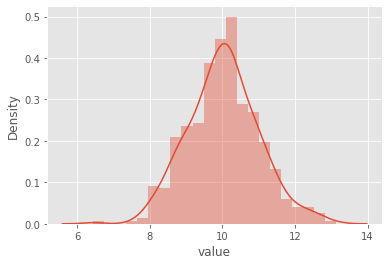

In [14]:
sns.distplot(Control_group)

<AxesSubplot:xlabel='value', ylabel='Density'>

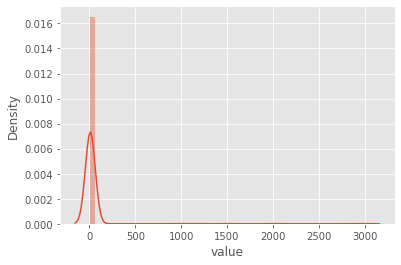

In [15]:
sns.distplot(Treatment_group)

<AxesSubplot:xlabel='experimentVariant', ylabel='value'>

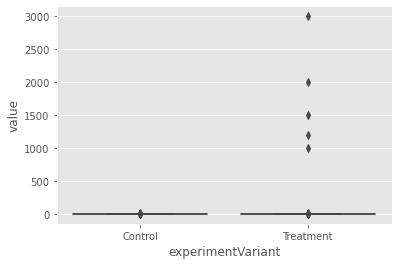

In [16]:
sns.boxplot(x='experimentVariant', y='value', data=hw_bootstrap)

In [17]:
# дисперсии не гомогенны
ss.levene(Control_group, Treatment_group)

LeveneResult(statistic=4.297836608151554, pvalue=0.03841703888538016)

In [18]:
# данные контрольной группы нормальны, а тестовой нет 
print(ss.shapiro(Control_group))
print(ss.shapiro(Treatment_group))

ShapiroResult(statistic=0.9959248900413513, pvalue=0.22416365146636963)
ShapiroResult(statistic=0.07038933038711548, pvalue=1.0930128021733573e-43)


In [20]:
# данные контрольной группы нормальны, а тестовой нет
print(ss.normaltest(Control_group))
print(ss.normaltest(Treatment_group))

NormaltestResult(statistic=2.943458720256407, pvalue=0.2295282048395919)
NormaltestResult(statistic=929.5157667884811, pvalue=1.439513760946726e-202)


In [ ]:
# попробуем прологарифмировать

In [21]:
hw_bootstrap['value_log'] = np.log(hw_bootstrap.value)  

<AxesSubplot:xlabel='value_log', ylabel='Density'>

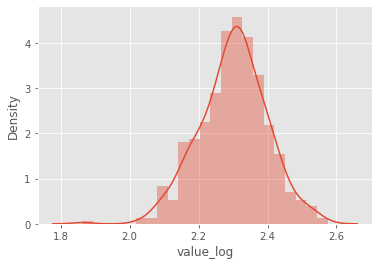

In [23]:
sns.distplot(hw_bootstrap[hw_bootstrap.experimentVariant == 'Control'].value_log)

<AxesSubplot:xlabel='value_log', ylabel='Density'>

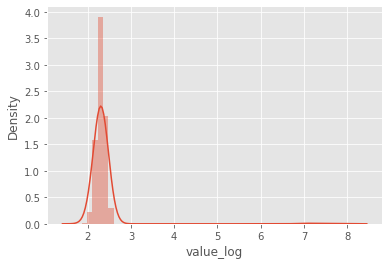

In [24]:
sns.distplot(hw_bootstrap[hw_bootstrap.experimentVariant == 'Treatment'].value_log)

<AxesSubplot:xlabel='experimentVariant', ylabel='value_log'>

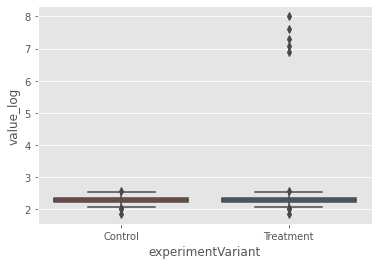

In [25]:
sns.boxplot(x='experimentVariant', y='value_log', data=hw_bootstrap)

In [26]:
# дисперсии не гомогенны
ss.levene(hw_bootstrap[hw_bootstrap.experimentVariant == 'Control'].value_log, 
          hw_bootstrap[hw_bootstrap.experimentVariant == 'Treatment'].value_log)

LeveneResult(statistic=4.817835287955753, pvalue=0.028396424031491906)

In [27]:
# данные не нормальны
print(ss.shapiro(hw_bootstrap[hw_bootstrap.experimentVariant == 'Control'].value_log))
print(ss.shapiro(hw_bootstrap[hw_bootstrap.experimentVariant == 'Treatment'].value_log))

ShapiroResult(statistic=0.9936519861221313, pvalue=0.034097425639629364)
ShapiroResult(statistic=0.19973421096801758, pvalue=1.5265745470354557e-41)


In [28]:
# данные не нормальны
print(ss.normaltest(hw_bootstrap[hw_bootstrap.experimentVariant == 'Control'].value_log))
print(ss.normaltest(hw_bootstrap[hw_bootstrap.experimentVariant == 'Treatment'].value_log))

NormaltestResult(statistic=8.813093383295357, pvalue=0.012197226469575023)
NormaltestResult(statistic=800.4026430070121, pvalue=1.5659374863543855e-174)


In [29]:
ttest_ind(Control_group, Treatment_group)

Ttest_indResult(statistic=-2.0729020485356604, pvalue=0.038437593613498765)

In [30]:
ttest_ind(hw_bootstrap[hw_bootstrap.experimentVariant == 'Control'].value_log,
         hw_bootstrap[hw_bootstrap.experimentVariant == 'Treatment'].value_log)

Ttest_indResult(statistic=-2.1379349959049563, pvalue=0.03276440163234999)

In [ ]:
# При проведении t-теста нулевая гипотеза, что различий между значениями средних нет. 
# Значение pvalue меньше 0.05, но дисперсии не гомогенны и данные обеих групп не нормальны, 
# лучше посмотреть непараметрический тест или бутстрап.

In [ ]:
# U-тест Mann-Whitney 

In [31]:
mannwhitneyu(Control_group, Treatment_group)

MannwhitneyuResult(statistic=124189.5, pvalue=0.8592148582485579)

In [ ]:
# Нулевая гипотеза, что различий между значениями средних нет. 
# pvalue > 0.05, мы не можем опровергнуть нулевую гипотезу, 
# значит мы не можем понять, стали ли мы больше зарабатывать с пользователя или нет.

In [2]:
# Объявим функцию, которая позволит проверять гипотезы с помощью бутстрапа

In [32]:
def get_bootstrap(
    data_column_1, # числовые значения первой выборки
    data_column_2, # числовые значения второй выборки
    boot_it = 1000, # количество бутстрэп-подвыборок
    statistic = np.mean, # интересующая нас статистика
    bootstrap_conf_level = 0.95 # уровень значимости
):
    boot_data = []
    for i in tqdm(range(boot_it)): # извлекаем подвыборки
        samples_1 = data_column_1.sample(
            len(data_column_1), 
            replace = True # параметр возвращения
        ).values
        
        samples_2 = data_column_2.sample(
            len(data_column_1), 
            replace = True
        ).values
        
        boot_data.append(statistic(samples_1)-statistic(samples_2)) # mean() - применяем статистику
        
    pd_boot_data = pd.DataFrame(boot_data)
        
    left_quant = (1 - bootstrap_conf_level)/2
    right_quant = 1 - (1 - bootstrap_conf_level) / 2
    quants = pd_boot_data.quantile([left_quant, right_quant])
        
    p_1 = norm.cdf(
        x = 0, 
        loc = np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_2 = norm.cdf(
        x = 0, 
        loc = -np.mean(boot_data), 
        scale = np.std(boot_data)
    )
    p_value = min(p_1, p_2) * 2
        
    # Визуализация
    _, _, bars = plt.hist(pd_boot_data[0], bins = 50)
    for bar in bars:
        if bar.get_x() <= quants.iloc[0][0] or bar.get_x() >= quants.iloc[1][0]:
            bar.set_facecolor('red')
        else: 
            bar.set_facecolor('grey')
            bar.set_edgecolor('black')
    
    plt.style.use('ggplot')
    plt.vlines(quants,ymin=0,ymax=50,linestyle='--')
    plt.xlabel('boot_data')
    plt.ylabel('frequency')
    plt.title("Histogram of boot_data")
    plt.show()
       
    return {"boot_data": boot_data, 
            "quants": quants, 
            "p_value": p_value}

  0%|          | 0/1000 [00:00<?, ?it/s]

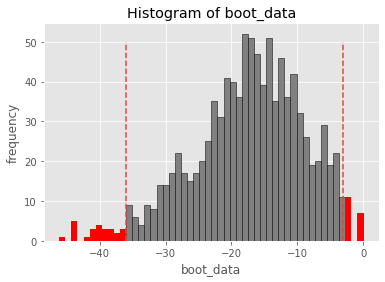

In [34]:
booted_data_stat_mean = get_bootstrap(Control_group, Treatment_group, statistic = np.mean) 

In [35]:
booted_data_stat_mean["p_value"] # альфа

0.04059336932656822

In [36]:
booted_data_stat_mean["quants"] # ДИ

,0
0.025,-36.011479
0.975,-2.993192


In [ ]:
# при применении бутстрапа  с методом statistic = np.mean pvalue < 0.05, можем отклонить нулевую гипотезу, 
# различия между группами значимые.

  0%|          | 0/1000 [00:00<?, ?it/s]

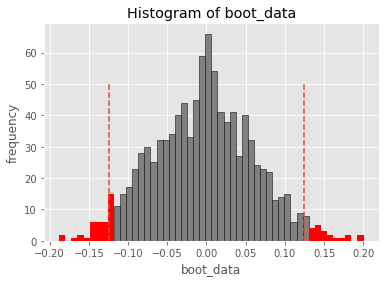

In [37]:
booted_data_stat_median = get_bootstrap(Control_group, Treatment_group, statistic = np.median) 

In [38]:
booted_data_stat_median["p_value"] # альфа

0.9495365735955255

In [39]:
booted_data_stat_median["quants"] # ДИ

,0
0.025,-0.124549
0.975,0.124543


In [ ]:
# при применении бутстрапа  с методом statistic = np.median pvalue > 0.05, можем принять нулевую гипотезу, 
# различия между группами не значимые.

In [ ]:
# Имеем: 

# t-тест применять нельзя (дисперсии не гомогенны и данные обеих групп не нормальны);
    
# U-тест Mann-Whitney дает  pvalue > 0.05, принимаем нулевую гипотезу, различий нет;

# при применении бутстрапа  с методом statistic = np.mean pvalue < 0.05, можем отклонить нулевую гипотезу, 
# различия между группами значимые, а если с методом statistic = np.median pvalue > 0.05, можем принять нулевую гипотезу, 
# различия между группами не значимые.

In [ ]:
# попробуем бутстрап без выбросов в тестовой группе

In [40]:
Control_group_max = Control_group.max()

In [46]:
Treatment_group_without_errors = Treatment_group[Treatment_group < Control_group_max]

<AxesSubplot:xlabel='value', ylabel='Density'>

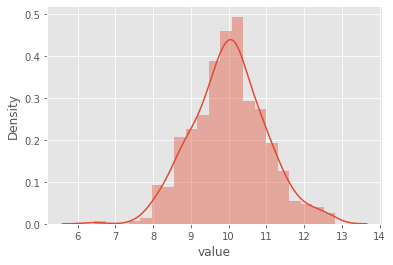

In [47]:
sns.distplot(Treatment_group_without_errors)

In [48]:
print(ss.shapiro(Treatment_group_without_errors))
print(ss.normaltest(Treatment_group_without_errors))
# теперь норм

ShapiroResult(statistic=0.9959736466407776, pvalue=0.24110229313373566)
NormaltestResult(statistic=1.8911796248415866, pvalue=0.3884503904565071)


  0%|          | 0/1000 [00:00<?, ?it/s]

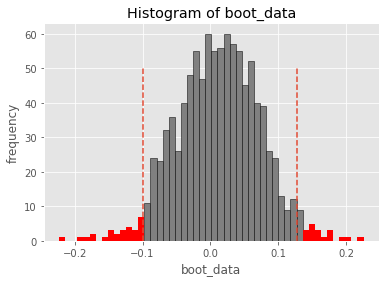

In [51]:
booted_data_stat_mean_without_errors = get_bootstrap(Control_group, Treatment_group_without_errors, statistic = np.mean) 

In [52]:
booted_data_stat_mean_without_errors["p_value"] # альфа

0.8472306260157314

In [ ]:
# Вывод: 

# t-тест применять нельзя (дисперсии не гомогенны и данные обеих групп не нормальны);
    
# U-тест Mann-Whitney менее чувствителен к экстремальному отклонению от нормальности и наличию выбросов, 
# дает  pvalue > 0.05, принимаем нулевую гипотезу, различий нет;

# бутстрап  с методом statistic = np.mean чувствителен к выбросам; 

# бутстрап с методом statistic = np.median не чувствителен к выбросам и экстремальным отклонениям от нормальности; 

# можем принять нулевую гипотезу, различия между группами не значимые.